In [2]:
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt

# Configures matplotlib inline, displays it appropriately
%matplotlib inline 

# The .plot() Method

In [15]:
google = data.DataReader(name="GOOG", data_source="yahoo", start="2007-05-21", end="2008-01-06")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-05-21,238.051697,231.852020,233.247940,233.779495,12398600,233.779495
2007-05-22,237.957321,234.971741,234.971741,236.392502,7727900,236.392502
2007-05-23,240.143097,235.344315,238.856476,235.453598,10186200,235.453598


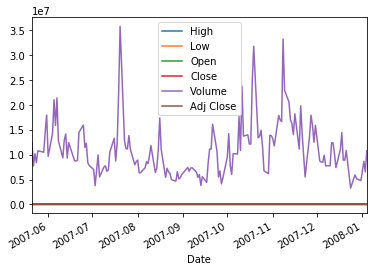

In [16]:
# It looks like only volume was plotted, but all were plotted but volume values dwarf other column values
google.plot()

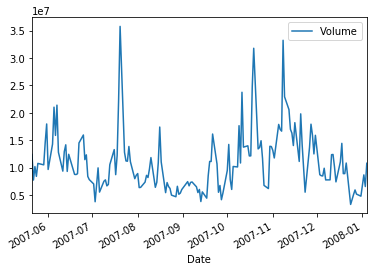

In [18]:
# Focus on a specific column by providing arguments for the axies
google.plot(y = "Volume")

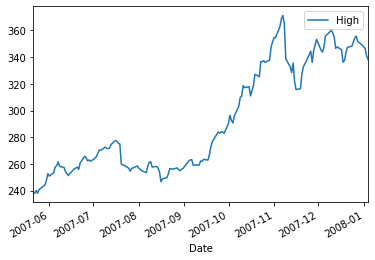

In [19]:
# Check out the iPhone
google.plot(y = "High")

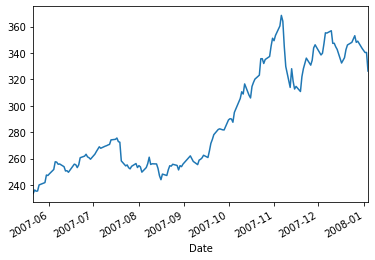

In [21]:
# You can call plot on a specific series
google["Close"].plot()

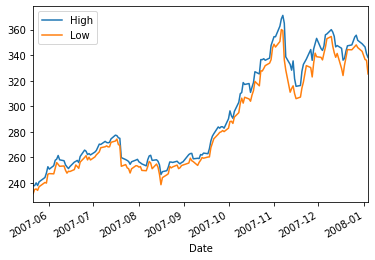

In [22]:
# Plot with two columns
google[["High", "Low"]].plot()

# Modifying Aesthetics

In [23]:
google = data.DataReader(name="GOOG", data_source="yahoo", start="2007-05-21", end="2008-01-06")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-05-21,238.051697,231.852020,233.247940,233.779495,12398600,233.779495
2007-05-22,237.957321,234.971741,234.971741,236.392502,7727900,236.392502
2007-05-23,240.143097,235.344315,238.856476,235.453598,10186200,235.453598


In [24]:
# Available templates
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

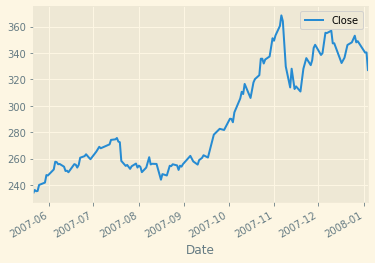

In [27]:
# This will change styles across workbook, therefore you must reuse in each cell to use different styles
plt.style.use("Solarize_Light2")
google.plot(y = "Close")

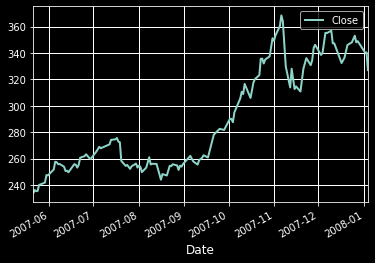

In [28]:
plt.style.use("dark_background")
google.plot(y = "Close")

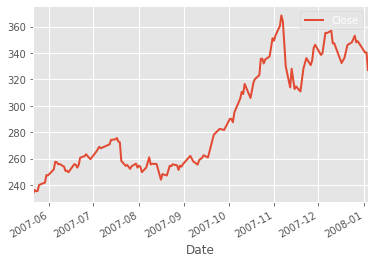

In [29]:
plt.style.use("ggplot")
google.plot(y = "Close")

# Bar Graphs

In [31]:
google = data.DataReader(name = "GOOG", data_source = "yahoo", start = "2004-01-01", end = "2019-05-31")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527


In [32]:
# Custome function to judge performance based on stock price
def rank_performance(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <=500:
        return "Satisfactory"
    else:
        return "Stellar"

In [34]:
# Apply custome function above to every value in Close column. Then count the responses.
google["Close"].apply(rank_performance).value_counts()

Satisfactory    1716
Stellar         1403
Poor             602
Name: Close, dtype: int64

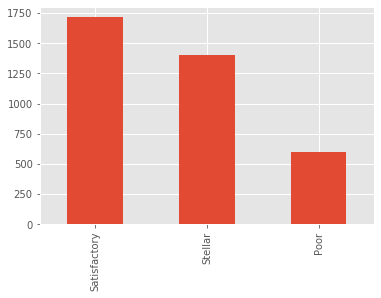

In [35]:
# Line graph is not good to plot this information, provide argument to kind parameter in .plot()
google["Close"].apply(rank_performance).value_counts().plot(kind = "bar")

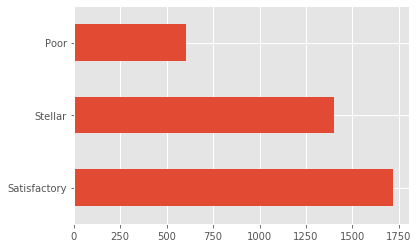

In [36]:
# Change to a horizontal Bar Chart
google["Close"].apply(rank_performance).value_counts().plot(kind = "barh")

# Pie Charts


In [38]:
apple = data.DataReader(name = "AAPL", data_source = "yahoo", start = "2012-01-01", end = "2018-12-31")
apple.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.464207
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.740776
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,52.315197


In [39]:
# What is average stock performance
apple["Close"].mean()

115.16464366912842

In [40]:
def rank_performance(stock_price):
    if stock_price >= 115.16464366912842:
        return "Above Average"
    else:
        return "Below Average"

In [42]:
apple["Close"].apply(rank_performance).value_counts()

Below Average    1050
Above Average     710
Name: Close, dtype: int64

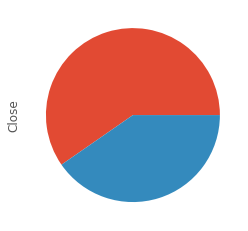

In [43]:
apple["Close"].apply(rank_performance).value_counts().plot(kind = "pie")

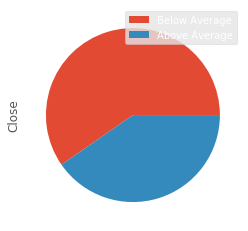

In [45]:
# Pie Chart is missing a legend, add one to make sense of it
apple["Close"].apply(rank_performance).value_counts().plot(kind = "pie", legend = True)

# Histograms

In [46]:
google = data.DataReader(name = "GOOG", data_source = "yahoo", start = "2004-01-01", end = "2019-05-31")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527


In [47]:
# I want to see how many times the stock is between certain figures
# This custom function rounds to the lowest hundred
def custom_round(stock_price):
    return int(stock_price / 100) * 100

In [49]:
# Sort index for easier reading
google["High"].apply(custom_round).value_counts().sort_index()

0        159
100      419
200     1138
300      439
400      154
500      416
600      105
700      276
800       89
900      127
1000     164
1100     170
1200      65
Name: High, dtype: int64

In [50]:
# 13 unique values or buckets
google["High"].apply(custom_round).nunique()

13

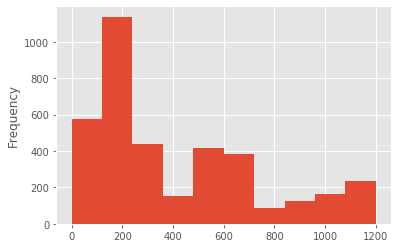

In [51]:
google["High"].apply(custom_round).plot(kind = "hist")

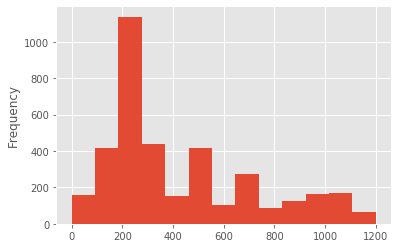

In [52]:
# The x-axis above is off a bit, combat this by giving the argument of unique values to the bins parameter
# Google, Stack Overfolw have lots of information for perfecting such issues
unique_bins = google["High"].apply(custom_round).nunique()
google["High"].apply(custom_round).plot(kind = "hist", bins = unique_bins)